# Test final del módulo 7: Fundamentos de Deep Learning

Entrega del trabajo

Enviar la solución en formato jupyter-notebook antes de las 13:00 pm del Martes 15 de Febrero al correo juan.mondaca@gmail.com Grabar el archivo ipynb con su nombre y apellido.

# Problema a resolver

Crear una red neuronal densa con Keras que pueda pronósticar el valor promedio de una casa. El dataset a utilizar fue definido en http://lib.stat.cmu.edu/datasets/boston y tiene información de un censo de viviendas en una región de Boston

Características del conjunto de datos

El conjunto de datos es pequeño, con sólo 506 casos. Contiene 14 características que se describen a continuación:

    CRIM: per capita crime rate by town
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS: proportion of non-retail business acres per town.
    CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX: nitric oxides concentration (parts per 10 million)
    RM: average number of rooms per dwelling
    AGE: proportion of owner-occupied units built prior to 1940
    DIS: weighted distances to five Boston employment centres
    RAD: index of accessibility to radial highways
    TAX: full-value property-tax rate per 10,000 dollars
    PTRATIO: pupil-teacher ratio by town
    B: 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
    LSTAT: % lower status of the population
    MEDV: Median value of owner-occupied homes in 1000 dollars


# Condiciones
El objetivo de nuestro problema de regresión con una RNA densa es utilizar las 13 primeras características para predecir el valor de MEDV (que representa el precio de la vivienda).
La red debe ser secuencial y tener tres capas Densas (2 de ocultas y una de salida). El número de input o neuronas de las capa debe ser definidos por ud (pero debe ser a lo menos 10 en las ocultas). Como función de activación se sugiere relu. Los demás hiperparámetros son seleccionados por ud.

In [1]:
# imports
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
from tensorflow import keras
keras.__version__

'2.8.0'

In [3]:
# obtener el dataset
from tensorflow.keras import datasets

In [4]:
boston_housing = datasets.boston_housing
boston_housing

<module 'keras.api._v2.keras.datasets.boston_housing' from 'C:\\Users\\nico_\\AppData\\Roaming\\Python\\Python38\\site-packages\\keras\\api\\_v2\\keras\\datasets\\boston_housing\\__init__.py'>

In [5]:
#En primera instancia separaremos el dataset en las variables de entrenamiento y testeo
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

In [6]:
import pandas as pd
prueba_datos=pd.DataFrame(X_train)

In [7]:
#Observamos la estructura de los datos
prueba_datos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


A partir de los datos observados podemos pensar que seria prudente realizar una normalización de los datos para que nuestra red neuronal trabaje de buena manera.

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


Además revisamos los datos para ver que tengamos las 14 columnas (X e y) y los 506 casos comentados inicialmente.

In [9]:
#procesando los datos
#Realizamos un procesamiento de los datos usando el metodo MinMaxScaler visto anteriormente.

from sklearn.preprocessing import MinMaxScaler
X_train_norm= MinMaxScaler().fit_transform(X_train)
X_test_norm= MinMaxScaler().fit_transform(X_test)


In [10]:
#Realizamos una division de los datos de test en nuevos datos de test y de validación 
#que utilizaremos mas adelante.

from sklearn.model_selection import train_test_split
X_test_fin,X_val,y_test_fin,y_val=train_test_split(X_test_norm,y_test,test_size=0.7)

In [11]:
#definiendo la arquitectura de la RNA
from tensorflow.keras import models
from tensorflow.keras import layers


In [12]:
#Definiremos una red con 100 neuronas (número aleatorio) pero prestando atención a que requerimos una salida
#por lo que en la tercera capa tendremos una neurona. Además definiremos el conjunto de entrada como 13
#dado que tenemos 13 datos distintos por fila
network=models.Sequential()
neu1=50
neu2=50
neu3=1
network.add(layers.Dense(neu1,activation = "relu",input_shape=(13,)))
network.add(layers.Dense(neu2,activation = "relu"))
network.add(layers.Dense(neu3,activation = "relu"))

In [13]:
#Resumen de la red
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                700       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,301
Trainable params: 3,301
Non-trainable params: 0
_________________________________________________________________


Dado que no tenemos datos de salida categoricos no podemos utilizar el categoical cross entropy como funcion de perdida, optaremos por otra del tipo regresion como la mean squared error (MSE).Ademas como optimizador probaremos distintos que se pueden encontrar en la bibliografia. En en parámetro métricas partimos inicialmente con las vistas en clase Accuracy y Precision sin embargo la de precision nos arrojaba un error. Hemos decidido sacarla y agregar otra metrica como el error absoluto medio.

In [14]:
network.compile(loss="mse",optimizer="Nadam",metrics=["Accuracy","mae"])

In [15]:
historiaNadam = network.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val))

Epoch 1/100
13/13 [==============================] - 1s 21ms/step - loss: 2288.0723 - Accuracy: 0.0000e+00 - mae: 36.6470 - val_loss: 597.6887 - val_Accuracy: 0.0000e+00 - val_mae: 22.7643
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 124.3034 - Accuracy: 0.0000e+00 - mae: 8.4426 - val_loss: 597.6572 - val_Accuracy: 0.0000e+00 - val_mae: 22.7629
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 77.5144 - Accuracy: 0.0000e+00 - mae: 6.4536 - val_loss: 597.2618 - val_Accuracy: 0.0000e+00 - val_mae: 22.7525
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 72.6965 - Accuracy: 0.0000e+00 - mae: 6.2392 - val_loss: 597.1348 - val_Accuracy: 0.0000e+00 - val_mae: 22.7493
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 71.5352 - Accuracy: 0.0000e+00 - mae: 6.1414 - val_loss: 597.0934 - val_Accuracy: 0.0000e+00 - val_mae: 22.7485
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - los

13/13 [==============================] - 0s 4ms/step - loss: 47.6358 - Accuracy: 0.0000e+00 - mae: 4.8573 - val_loss: 596.1411 - val_Accuracy: 0.0000e+00 - val_mae: 22.7476
Epoch 46/100
13/13 [==============================] - 0s 4ms/step - loss: 46.6080 - Accuracy: 0.0000e+00 - mae: 4.8020 - val_loss: 595.6589 - val_Accuracy: 0.0000e+00 - val_mae: 22.7372
Epoch 47/100
13/13 [==============================] - 0s 4ms/step - loss: 43.3426 - Accuracy: 0.0000e+00 - mae: 4.6144 - val_loss: 595.0713 - val_Accuracy: 0.0000e+00 - val_mae: 22.7244
Epoch 48/100
13/13 [==============================] - 0s 4ms/step - loss: 42.6899 - Accuracy: 0.0000e+00 - mae: 4.7395 - val_loss: 595.8669 - val_Accuracy: 0.0000e+00 - val_mae: 22.7445
Epoch 49/100
13/13 [==============================] - 0s 4ms/step - loss: 48.7226 - Accuracy: 0.0000e+00 - mae: 5.0197 - val_loss: 595.1995 - val_Accuracy: 0.0000e+00 - val_mae: 22.7298
Epoch 50/100
13/13 [==============================] - 0s 4ms/step - loss: 41.7098 -

13/13 [==============================] - 0s 4ms/step - loss: 49.6473 - Accuracy: 0.0000e+00 - mae: 5.3142 - val_loss: 590.1130 - val_Accuracy: 0.0000e+00 - val_mae: 22.6420
Epoch 90/100
13/13 [==============================] - 0s 4ms/step - loss: 37.5363 - Accuracy: 0.0000e+00 - mae: 4.4492 - val_loss: 589.1664 - val_Accuracy: 0.0000e+00 - val_mae: 22.6216
Epoch 91/100
13/13 [==============================] - 0s 4ms/step - loss: 32.6025 - Accuracy: 0.0000e+00 - mae: 4.1727 - val_loss: 589.4569 - val_Accuracy: 0.0000e+00 - val_mae: 22.6286
Epoch 92/100
13/13 [==============================] - 0s 5ms/step - loss: 38.7057 - Accuracy: 0.0000e+00 - mae: 4.4924 - val_loss: 588.9121 - val_Accuracy: 0.0000e+00 - val_mae: 22.6173
Epoch 93/100
13/13 [==============================] - 0s 5ms/step - loss: 60.5538 - Accuracy: 0.0000e+00 - mae: 6.2868 - val_loss: 589.5514 - val_Accuracy: 0.0000e+00 - val_mae: 22.6299
Epoch 94/100
13/13 [==============================] - 0s 6ms/step - loss: 38.1025 -

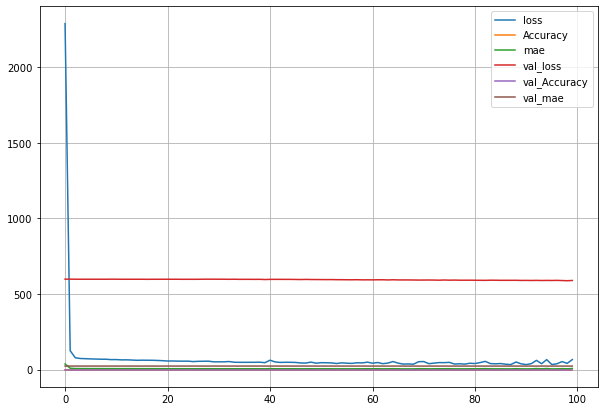

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(historiaNadam.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [17]:
test_loss_nadam,test_acc_nadam,test_prec_nadam = network.evaluate(X_test_fin,y_test_fin)

1/1 [==============================] - 0s 38ms/step - loss: 619.9399 - Accuracy: 0.0000e+00 - mae: 23.0583


Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 4231.2583 - Accuracy: 0.0000e+00 - mae: 37.4879 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3950 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3951 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3950 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3950 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 6/100
13/13 [==============================] - 0s 5ms/ste

13/13 [==============================] - 0s 3ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3950 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 45/100
13/13 [==============================] - 0s 5ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3951 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 46/100
13/13 [==============================] - 0s 4ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3951 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 47/100
13/13 [==============================] - 0s 4ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3951 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 48/100
13/13 [==============================] - 0s 5ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3950 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 49/100
13/13 [==============================] - 0s 4ms/step - loss:

Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3950 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3950 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3951 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 91/100
13/13 [==============================] - 0s 4ms/step - loss: 586.1605 - Accuracy: 0.0000e+00 - mae: 22.3950 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 586.1604 - Accuracy: 0.0000e+00 - mae: 22.3951 - val_loss: 607.9281 - val_Accuracy: 0.0000e+00 - val_mae: 22.9722
Epoch 93/100
13/13 [==============================] - 0s 4ms

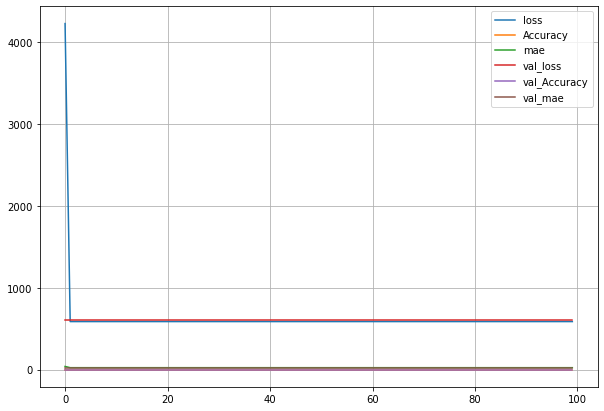

1/1 [==============================] - 0s 16ms/step - loss: 634.8894 - Accuracy: 0.0000e+00 - mae: 23.3333


In [20]:
network2=models.Sequential()
neu1=50
neu2=50
neu3=1
network2.add(layers.Dense(neu1,activation = "relu",input_shape=(13,)))
network2.add(layers.Dense(neu2,activation = "relu"))
network2.add(layers.Dense(neu3,activation = "relu"))
network2.compile(loss="mse",optimizer="sgd",metrics=["Accuracy","mae"])
historia = network2.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val))
pd.DataFrame(historia.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()
test_loss_sgd,test_acc_sgd,test_prec_sgd = network.evaluate(X_test_fin,y_test_fin)

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 151.6065 - Accuracy: 0.0000e+00 - mae: 8.8076 - val_loss: 607.7048 - val_Accuracy: 0.0000e+00 - val_mae: 22.9694
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 109.9904 - Accuracy: 0.0000e+00 - mae: 7.9810 - val_loss: 607.5725 - val_Accuracy: 0.0000e+00 - val_mae: 22.9676
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 99.5099 - Accuracy: 0.0000e+00 - mae: 7.8047 - val_loss: 607.7885 - val_Accuracy: 0.0000e+00 - val_mae: 22.9704
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 86.5024 - Accuracy: 0.0000e+00 - mae: 7.1917 - val_loss: 607.4036 - val_Accuracy: 0.0000e+00 - val_mae: 22.9653
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 97.6107 - Accuracy: 0.0000e+00 - mae: 7.7181 - val_loss: 607.5408 - val_Accuracy: 0.0000e+00 - val_mae: 22.9672
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss:

13/13 [==============================] - 0s 4ms/step - loss: 64.8682 - Accuracy: 0.0000e+00 - mae: 5.9892 - val_loss: 602.8375 - val_Accuracy: 0.0000e+00 - val_mae: 22.8943
Epoch 46/100
13/13 [==============================] - 0s 4ms/step - loss: 37.4562 - Accuracy: 0.0000e+00 - mae: 4.4563 - val_loss: 603.3757 - val_Accuracy: 0.0000e+00 - val_mae: 22.9032
Epoch 47/100
13/13 [==============================] - 0s 4ms/step - loss: 58.9926 - Accuracy: 0.0000e+00 - mae: 5.8390 - val_loss: 602.9512 - val_Accuracy: 0.0000e+00 - val_mae: 22.8962
Epoch 48/100
13/13 [==============================] - 0s 6ms/step - loss: 56.8232 - Accuracy: 0.0000e+00 - mae: 5.6848 - val_loss: 602.2473 - val_Accuracy: 0.0000e+00 - val_mae: 22.8847
Epoch 49/100
13/13 [==============================] - 0s 5ms/step - loss: 43.7281 - Accuracy: 0.0000e+00 - mae: 4.9496 - val_loss: 602.1375 - val_Accuracy: 0.0000e+00 - val_mae: 22.8828
Epoch 50/100
13/13 [==============================] - 0s 4ms/step - loss: 63.2058 -

13/13 [==============================] - 0s 5ms/step - loss: 49.1084 - Accuracy: 0.0000e+00 - mae: 5.3859 - val_loss: 596.6866 - val_Accuracy: 0.0000e+00 - val_mae: 22.7896
Epoch 90/100
13/13 [==============================] - 0s 4ms/step - loss: 41.0211 - Accuracy: 0.0000e+00 - mae: 4.7621 - val_loss: 596.1995 - val_Accuracy: 0.0000e+00 - val_mae: 22.7813
Epoch 91/100
13/13 [==============================] - 0s 4ms/step - loss: 42.1670 - Accuracy: 0.0000e+00 - mae: 4.8851 - val_loss: 596.0274 - val_Accuracy: 0.0000e+00 - val_mae: 22.7780
Epoch 92/100
13/13 [==============================] - 0s 5ms/step - loss: 46.4008 - Accuracy: 0.0000e+00 - mae: 5.0798 - val_loss: 596.3159 - val_Accuracy: 0.0000e+00 - val_mae: 22.7832
Epoch 93/100
13/13 [==============================] - 0s 4ms/step - loss: 33.2644 - Accuracy: 0.0000e+00 - mae: 4.2334 - val_loss: 595.2426 - val_Accuracy: 0.0000e+00 - val_mae: 22.7638
Epoch 94/100
13/13 [==============================] - 0s 4ms/step - loss: 37.7002 -

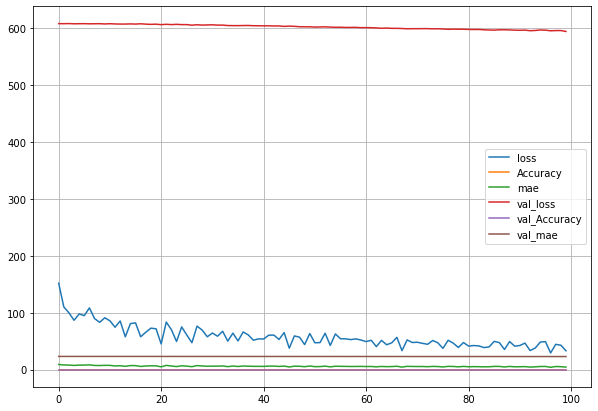

1/1 [==============================] - 0s 16ms/step - loss: 634.8894 - Accuracy: 0.0000e+00 - mae: 23.3333


In [21]:
network3=models.Sequential()
neu1=50
neu2=50
neu3=1
network3.add(layers.Dense(neu1,activation = "relu",input_shape=(13,)))
network3.add(layers.Dense(neu2,activation = "relu"))
network3.add(layers.Dense(neu3,activation = "relu"))
network3.compile(loss="mse",optimizer="rmsprop",metrics=["Accuracy","mae"])
historia = network3.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val))
pd.DataFrame(historia.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()
test_loss_rmsprop,test_acc_rmsprop,test_prec_rmsprop = network.evaluate(X_test_fin,y_test_fin)

In [27]:
datosfinales=[[test_loss_nadam,test_acc_nadam,test_prec_nadam],[test_loss_sgd,test_acc_sgd,test_prec_sgd],[test_loss_rmsprop,test_acc_rmsprop,test_prec_rmsprop]]
datosfinalesdf=pd.DataFrame(datosfinales,index =["nadam","sgd","rmsprop"],columns=["loss","Accuracy","mae"])
datosfinalesdf

,loss,Accuracy,mae
nadam,619.939880,0.0,23.058329
sgd,634.889404,0.0,23.333334
rmsprop,634.889404,0.0,23.333334


### Conclusiones 

Luego de diversas pruebas podemos concluir lo siguiente.

1.- Realizamos el estudio con tres tipos de optimizadores distintos, obteniendo como resultado que nadam para este caso tiene los mejores resultados con la menor perdida y el menor MAE.

2.- Observamos además que ninguno de los optimizadores es capaz de lograr alguna mejora en Accuracy. Esto se debe a que estamos ante un problema de regresión y la "exactitud" se relaciona a los problema de clasificación.

3.- El optimizador Nadam tiende a estabilizarse mucho mas rapido en un valor determinado por lo que podriamos con certeza disminuir el numero de epocas a 20 dado que ya obtenemos un valor bastante parecido al de luego de 200 epocas.